# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [55]:
import pandas as pd

# load the training dataset
data = pd.read_csv('real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

## Starting with the data exploration
Checking if there are null value, then seeing a summary of the data, most of it is numerical, only two features are cathegorical.

In [56]:
data.isnull().sum()
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


No null values, and the variables look ok, then We use this next function to plot and print central tendency values and distribution of the numercial features.

In [57]:
# Create a function that we can re-use
def show_distribution(var_data, str1):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]
    print(f"{str1}")
    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,7))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle(f'Data Distribution ({str1})')

Plotting the raw data to check the outliers.

house_age
Minimum:0.00
Mean:17.71
Median:16.10
Mode:0.00
Maximum:43.80

transit_distance
Minimum:23.38
Mean:1083.89
Median:492.23
Mode:289.32
Maximum:6488.02

latitude
Minimum:24.93
Mean:24.97
Median:24.97
Mode:24.97
Maximum:25.01

longitude
Minimum:121.47
Mean:121.53
Median:121.54
Mode:121.54
Maximum:121.57

price_per_unit
Minimum:7.60
Mean:37.98
Median:38.45
Mode:24.70
Maximum:117.50



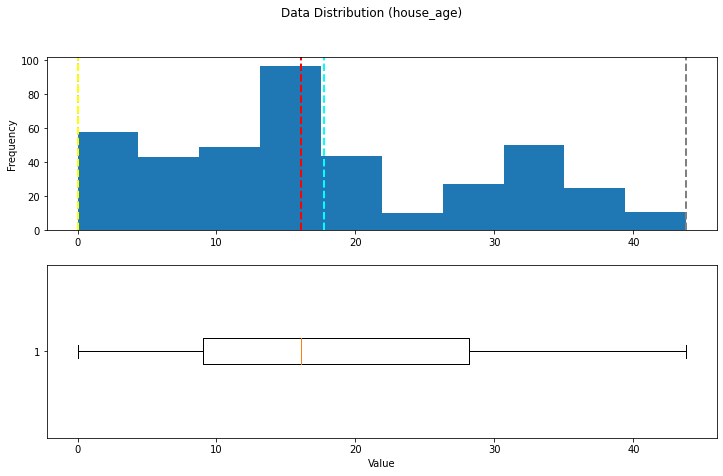

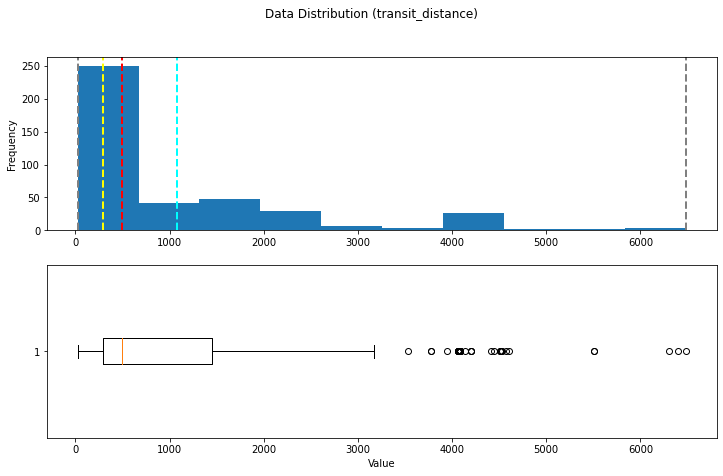

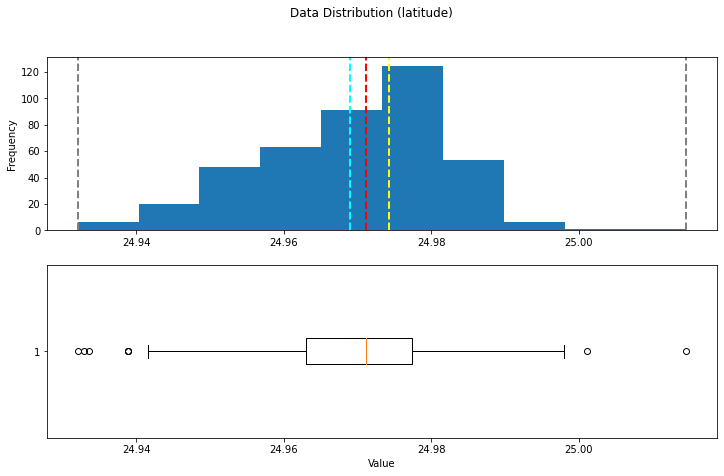

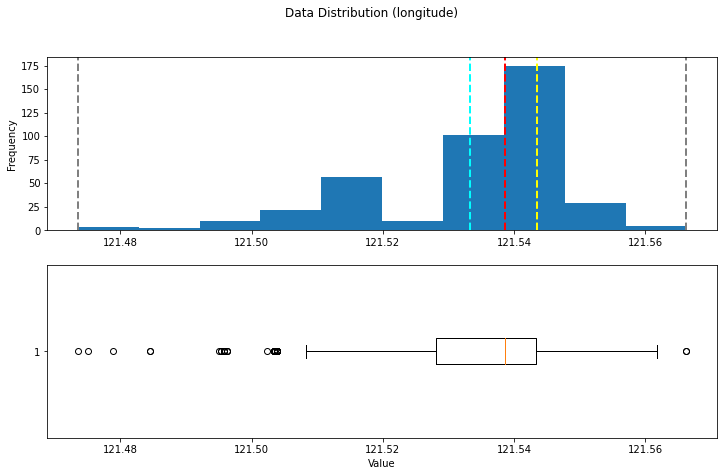

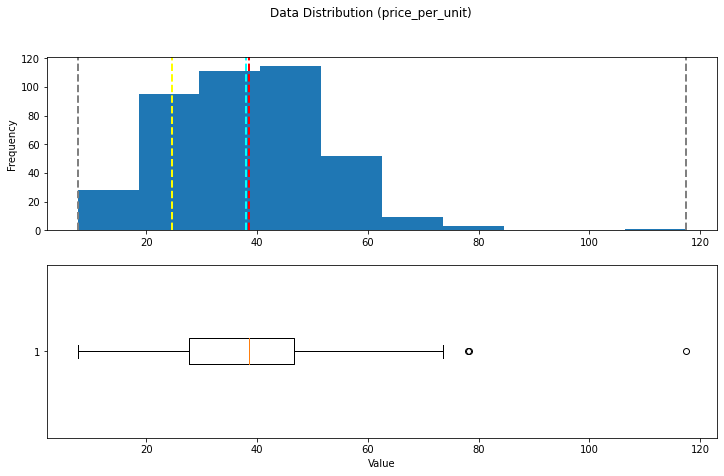

In [58]:
NumFeats = ['house_age',  'transit_distance', 'latitude', 'longitude', 'price_per_unit']
for col in NumFeats:
    show_distribution(data[col], col)

We have as label the price per unit, that have some outlier, so we need to trim them keeping the values below the 99%, and then plot the cleaned data.

70.88300000000001
house_age
Minimum:0.00
Mean:17.73
Median:16.10
Mode:0.00
Maximum:43.80

transit_distance
Minimum:23.38
Mean:1093.85
Median:492.23
Mode:289.32
Maximum:6488.02

latitude
Minimum:24.93
Mean:24.97
Median:24.97
Mode:24.97
Maximum:25.01

longitude
Minimum:121.47
Mean:121.53
Median:121.54
Mode:121.54
Maximum:121.57

price_per_unit
Minimum:7.60
Mean:37.42
Median:38.30
Mode:24.70
Maximum:70.10



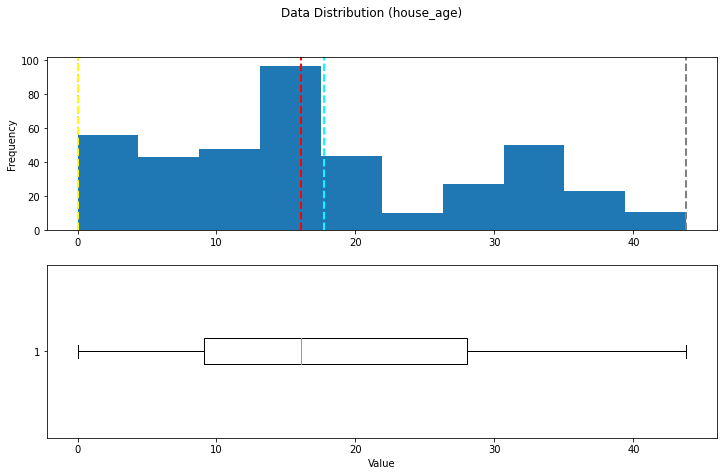

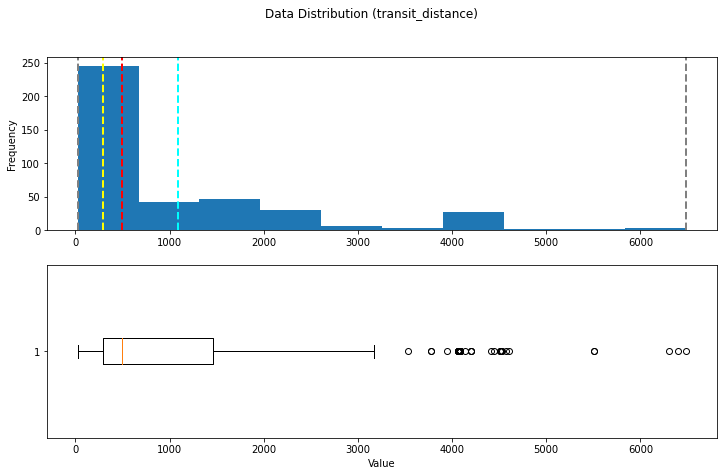

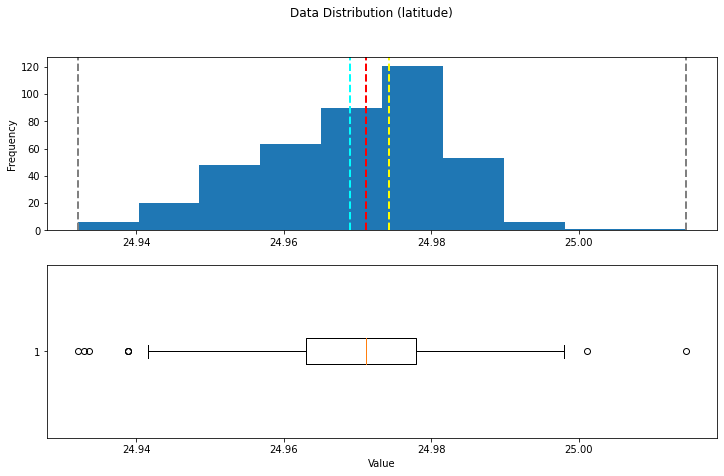

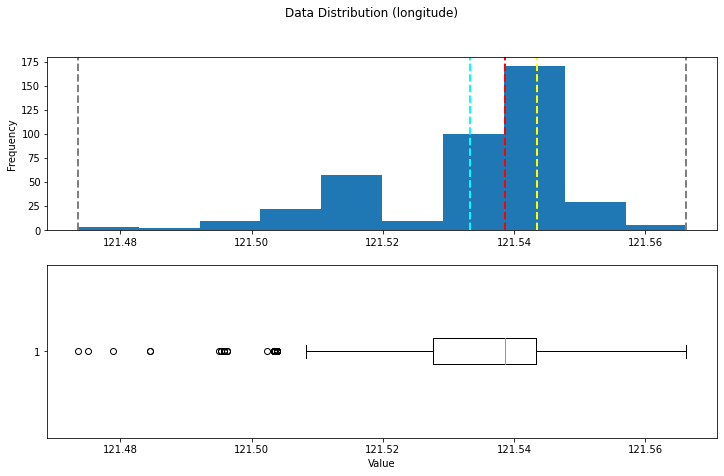

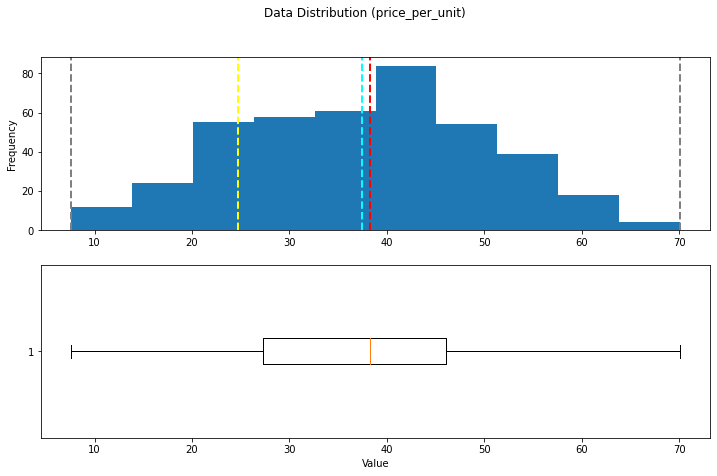

In [59]:
#### Trimming the outliers
q01 = data.price_per_unit.quantile(0.99)
data = data[data.price_per_unit < q01]
print(q01)


for col in NumFeats:
    show_distribution(data[col], col)

The price per unit data tend to have a normal distribution, let's check the density of it.

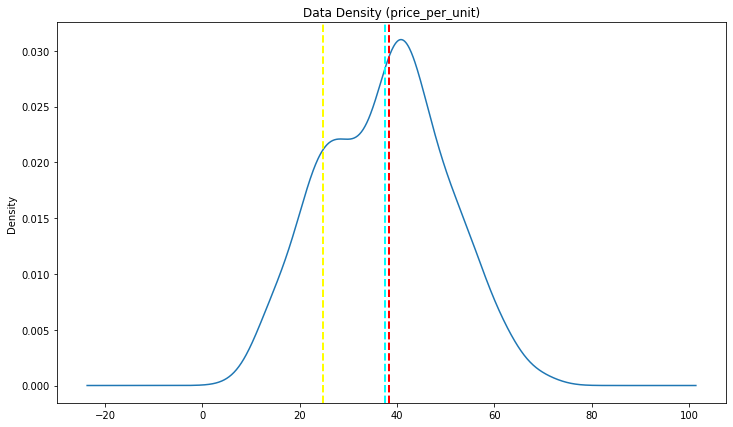

In [60]:
def show_density(var_data, str1):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(12,7))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(f'Data Density ({str1})')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density 

show_density(data.price_per_unit, 'price_per_unit')

## Correlation in the data set
First we plot a heatmap showing the correlation between variables.

Text(0.5, 1.0, 'Real state evaluation')

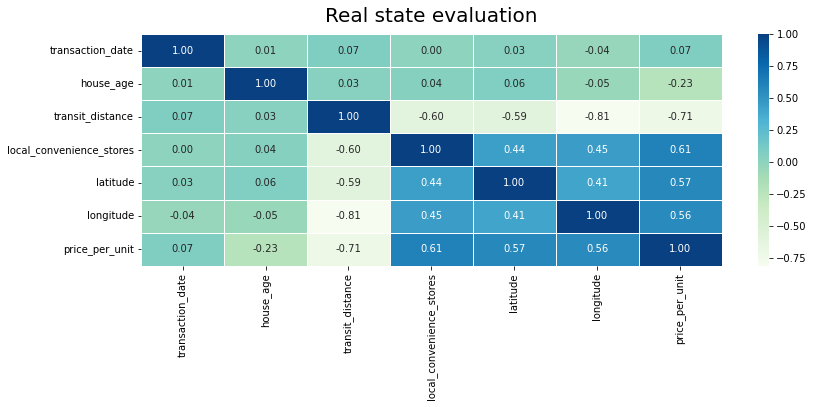

In [61]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
Corr = data.corr()



f, ax =plt.subplots(figsize=(13,4))
hm = sns.heatmap(
    round(Corr,2),
    annot=True,
    ax=ax,
    cmap="GnBu",
    fmt='.2f',
    linewidths=0.7
)
f.subplots_adjust(top=0.93)
#t = f.suptitle("Inssurance Health Correlation Heatmap", fontsize=14)
hm.set_title('Real state evaluation', fontdict={'fontsize':20}, pad=12)




For the cathegorical values let's check the fraquency.

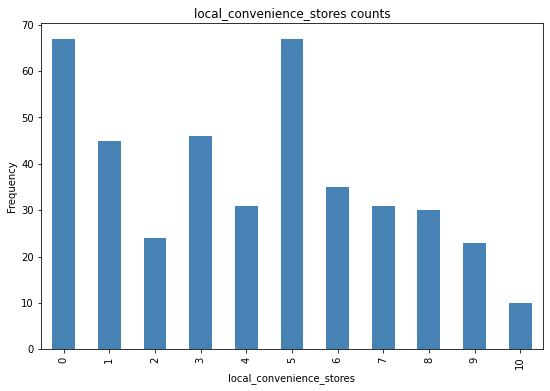

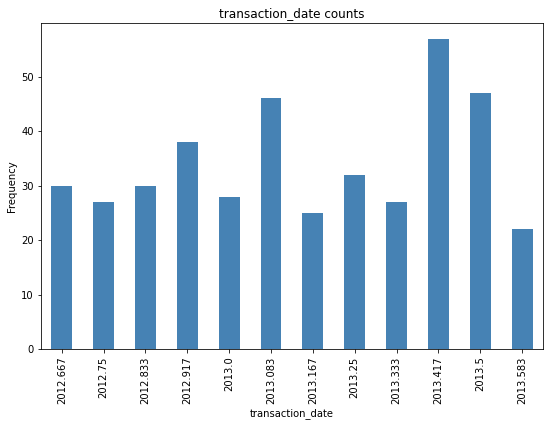

In [62]:
import numpy as np

# plot a bar plot for each categorical feature count
categorical_features = ['local_convenience_stores', 'transaction_date']

for col in categorical_features:
    counts = data[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

We can see that most of the transactions have zero and five convenience stores with walking distance, and the day with more transactions.

## For see better the correlation of the features with the label
We plot the scatter of features vs label, this could help us to indentify if there is some linear relation between them.

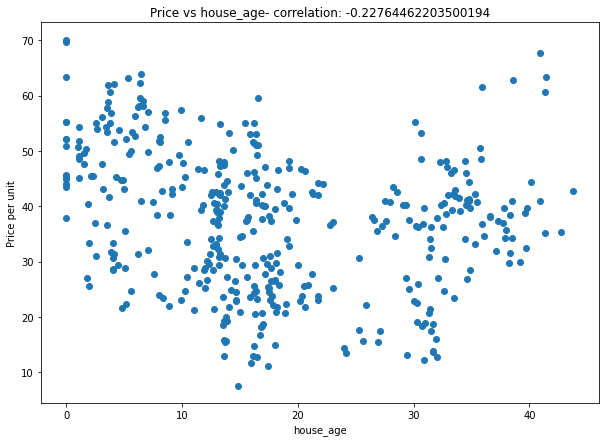

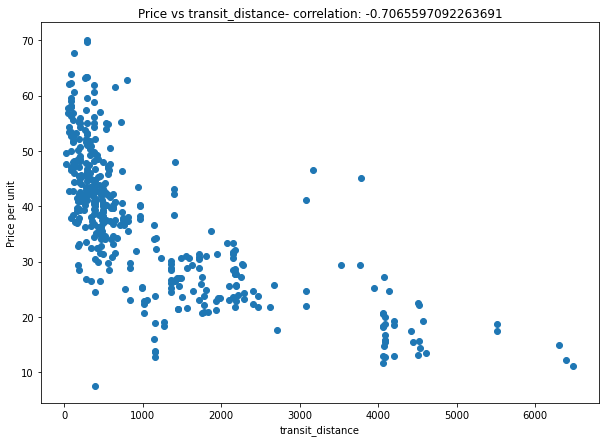

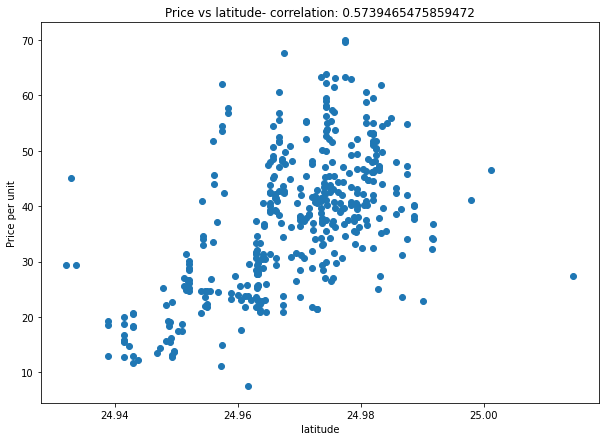

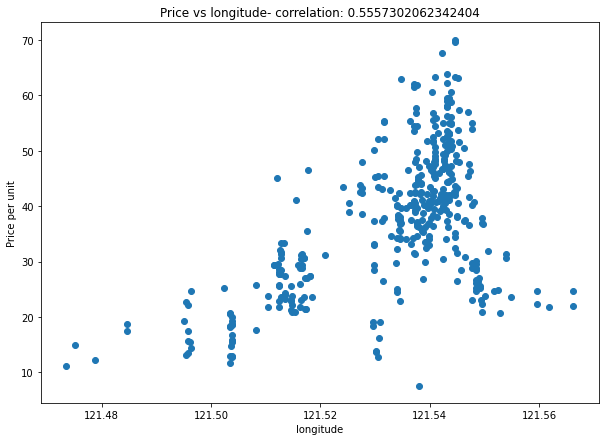

['house_age', 'transit_distance', 'latitude', 'longitude']

In [63]:
NumFeats = NumFeats[0:-1]
for col in NumFeats:
    fig = plt.figure(figsize=(10, 7))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Price per unit')
    ax.set_title('Price vs ' + col + '- correlation: ' + str(correlation))
plt.show()
NumFeats

We observe that there is a great negative relation in the distance to rail light, closet the station, higher the price, also regular positive linear relation with the latitude and longitude.

## Training the model

Data preparation to train the model

In [64]:
features = list(data.keys())
features=features[0:-1]
features

['transaction_date',
 'house_age',
 'transit_distance',
 'local_convenience_stores',
 'latitude',
 'longitude']

In [65]:
X, y =  data[features].values, data['price_per_unit']
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[2.0129170e+03 3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01
  1.2154024e+02]
 [2.0129170e+03 1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01
  1.2153951e+02]
 [2.0135830e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0135000e+03 1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01
  1.2154391e+02]
 [2.0128330e+03 5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01
  1.2154245e+02]
 [2.0126670e+03 7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01
  1.2151254e+02]
 [2.0126670e+03 3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01
  1.2153642e+02]
 [2.0134170e+03 2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01
  1.2154228e+02]
 [2.0135000e+03 3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01
  1.2148458e+02]
 [2.0134170e+03 1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01
  1.2151486e+02]]

Labels:
0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
5    32.1
6    40.3
7    46.7
8    18.8


Splitting the data

In [66]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))



Training Set: 286 rows
Test Set: 123 rows


Calling the model and the evaluation metrics, training, evaluating the model, also plotting the test labels vs the predicted ones.

GradientBoostingRegressor() 

MSE: 27.3949316878384
RMSE: 5.234016783297356
R2: 0.7950259688131347


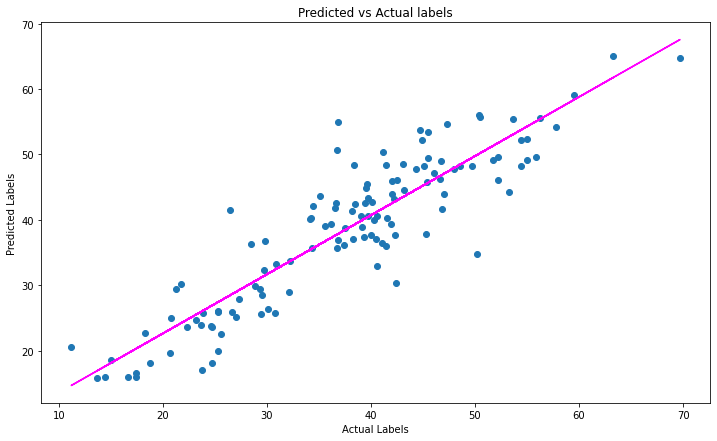

In [67]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
fig = plt.figure(figsize=(12,7))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicted vs Actual labels')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()



The goal was to get a RMSE lower than 7, we achieved  a 5.3, we could say that is a succesful model.
Now we save the model to use it else where if we want.

In [68]:
import joblib

# Save the model as a pickle file
filename = './house-price-model.pkl'
joblib.dump(model, filename)



['./house-price-model.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [69]:

import joblib
import numpy as np

filename = './house-price-model.pkl'
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation 
X_new = np.array([
    [2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348],
    [2013.000, 13.6, 4082, 0, 24.94155, 121.50381]]).astype('float64')

print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict 
results = loaded_model.predict(X_new)
for result in results:
    print('Prediction: {:.0f} price per unit'.format(result))


New sample: [2013.167, 16.2, 289.3248, 5.0, 24.98203, 121.54348]
Prediction: 49 price per unit
Prediction: 17 price per unit
